In [1]:
import math
import numpy as np
import pandas as pd
import sys
import re
from functions import *
from mining_functions import *
from collections import Counter
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy import stats
np.set_printoptions(precision=2)
pd.set_option('precision', 2)
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
PATH = '/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
def get_path(path = PATH):
    if os.name == 'posix':
        path = '/Documents/code/Phet-log-analyzer/cck/raw_data_parsing_check/'
        return os.environ['HOME']+path #'/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
    elif os.name == 'nt':
        if os.getenv("COMPUTERNAME") == 'PYRRHA':
                path = '/Documents/git/Phet-log-analyzer/cck/raw_data_parsing_check/'
        else:
            path = '/git/Phet-log-analyzer/cck/raw_data_parsing_check/'
        return os.environ['USERPROFILE']+ path.replace('/','\\') #'\\Google Drive\Jonathan Sarah Ido folder\data\CCK\\'
    else:
        raise Exception('OS not recongnized. I\'m confused.')
        
df = pd.read_csv(get_path() + 'phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
# dfx = pd.read_csv('C:\Users\Sarah\Documents\git\Phet-log-analyzer\cck\\raw_data_parsing_check\phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
df["student"] = df["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()
df["Family_tool"]=df["Family_tool"].str.capitalize()
df["Family_default"]=df["Family_default"].str.capitalize()
df["Family_both"]=df["Family_both"].str.capitalize()

df_scores = pd.read_csv(data_path + 'MATCHING_phet_cck_user_data_anonymized.txt')
df_scores["student"] = df_scores["student"].astype('category')


#### Crop activity data to get rid of activity #3

In [3]:
max_time = 25*60*1000
max_times = {s:min(df[df['student']==s]["Time Stamp"])+max_time for s in set(df['student'])}

def keep_by_time (row):
    if row["Time Stamp"] <= max_times[row["student"]]:
        return True
    else: 
        return False

df['keep'] = df.apply (lambda row: keep_by_time (row),axis=1)
df=df[df['keep']]

In [4]:
def add_text(attribute,family_category,cut_off, shortest_seq_length, longest_seq_length,B):
    text = """Showing sequences for students split by {0}, using the categories {1}.
            Removed sequences used by less than {2}% of students.
            Found sequences of lenght {3} to {4}.
            Using {5} time bins""".format(attribute,family_category,int(cut_off*100), shortest_seq_length, longest_seq_length,B)
    fig = plt.figure(figsize=(10, 4))
    ax = plt.gca()
    ax.text(0.5,0.5,text,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize = 15)
    plt.axis('off')
    return fig

def rank_sequences(sequence_counts,B,axesnum=None):
    ranks = []
    for seq,counts in sequence_counts.iteritems():
#         if np.sum(counts)>0:
        ranks.append((seq,calc_infogain(counts,B,axesnum)))
    return sorted(ranks, key=lambda tup: tup[1])

def get_top_seqs(ranks,N):
    return ranks[-N:]

STEPS
- get sequences (the same way we always do)
- remove all actions except C,P,$T_O$
- repeat analysis by group and time for seqs of lenths 2-10 (like last time)
- keep filter of 35% though prehaps we can increase it

OR, test frequency of all these seqs (6 combos):

* $T_1,T_2,T_M$ increasing complexity
* $T_1,T_M,T_2$ skipping compare and contrast
* $T_2,T_M,T_1$ back to basics
* $T_2,T_1,T_M$ back to basics then complex
* $T_M,T_1,T_2$ complex, then increasing
* $T_M,T_2,T_1$ decreasing in complextiy





### We run the info gain analysis on blocks of testing sequences

In [37]:
students = get_students(attribute='split pre',level='low')
CUT_OFF = 0.35 #we keep only sequences used once by at least 10% of students
shortest_seq_length = 2
longest_seq_length = 10

### PARAMETERS
attribute = 'split post t2'
level1 = 'high'
level2 = 'low'
family_category = "Family" #,"Family_tool","Family_default"]
axis = 1

BINS = 1
sequence_counts_group = get_sequence_use_by_timebin(df,students,family_category,
                                          1,attribute,level1,level2,
                                          shortest_seq_length,longest_seq_length,CUT_OFF,ignore = ['I','C','P']) #,remove_actions= ['C','P'])
tops = get_top_seqs(rank_sequences(sequence_counts,BINS,axis),15)

BINS = 4
sequence_counts_both = get_sequence_use_by_timebin(df,students,family_category,
                                  BINS,attribute,level1,level2,
                                  shortest_seq_length,longest_seq_length,CUT_OFF,ignore = ['I','C','P']) #,remove_actions= ['C','P'])


Getting sequence use over 1 time bins for 74 students split by split post t2. 
    Keeping only sequences used once by at least 35% of students 
    in each group and overall.
Getting sequence use over 4 time bins for 74 students split by split post t2. 
    Keeping only sequences used once by at least 35% of students 
    in each group and overall.


## Let's take a closer look at the top sequences

In [38]:
sequence_counts_group

{'TbTc': array([[ 14.],
        [ 10.]]), 'TbTs': array([[ 25.],
        [ 17.]]), 'TbTsTc': array([[ 23.],
        [ 15.]]), 'TcTb': array([[ 15.],
        [ 14.]]), 'TcTs': array([[ 16.],
        [ 14.]]), 'TsTc': array([[ 26.],
        [ 20.]]), 'TsTcTs': array([[ 11.],
        [ 12.]])}

In [39]:
sequence_counts_both

{'TbTc': array([[ 6.,  3.,  5.,  6.],
        [ 4.,  1.,  2.,  7.]]), 'TbTs': array([[ 24.,   3.,   3.,   3.],
        [ 17.,   3.,   1.,   3.]]), 'TbTsTc': array([[ 21.,   3.,   3.,   2.],
        [ 14.,   3.,   0.,   2.]]), 'TcTb': array([[ 7.,  3.,  6.,  3.],
        [ 8.,  4.,  3.,  3.]]), 'TcTs': array([[ 13.,   3.,   3.,   2.],
        [  8.,   5.,   5.,   5.]]), 'TsTc': array([[ 21.,   6.,   6.,   4.],
        [ 16.,   6.,   6.,   5.]]), 'TsTcTs': array([[ 10.,   1.,   3.,   1.],
        [  7.,   4.,   6.,   2.]])}

In [40]:
tops

[('TcTb', 0.00052697981401639282),
 ('TcTs', 0.0014909010823678237),
 ('TsTc', 0.0023567040136064366),
 ('TsTcTs', 0.010007208442481375),
 ('TbTs', 0.018059213135902308),
 ('TbTc', 0.022582182471828416),
 ('TbTsTc', 0.031538991239837832)]

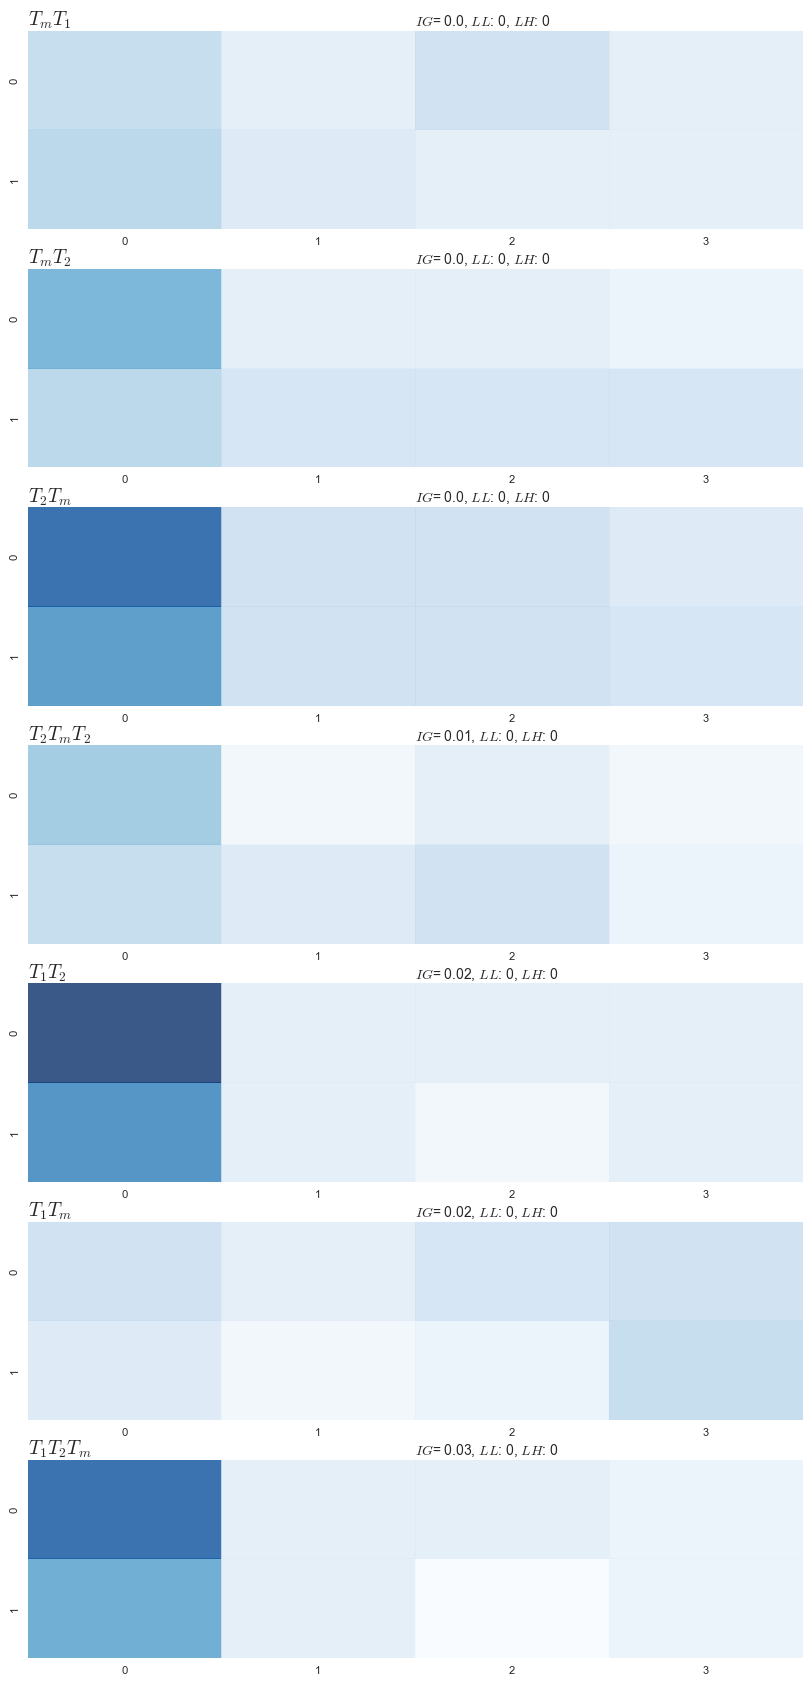

In [41]:
sns.set_style("darkgrid")
sns.set_context("paper")
all_seqs = zip(*tops)[0]
fig, axes = plt.subplots(len(tops),1)#, sharex=True, sharey=True)
maximum = int(max([np.amax(counts) for seq,counts in sequence_counts.iteritems() if seq in all_seqs]))
for i,(seq,ig) in enumerate(tops):
    ax = axes[i]
    data = sequence_counts[seq]
    ax = axes[i]
    hl,ll = 0,0
    seq = "$"+seq.replace('Ts','T_2').replace('Tb','T_1').replace('Tc','T_m')+"$"
    ax.text(0,2.05, seq, fontsize=14)
    ax.text(2.0,2.05, "$IG$= {0}, $LL$: {1}, $LH$: {2}".format(str(round(ig,2)),ll,hl), fontsize=10)
    heatmap = sns.heatmap(data, ax=ax, cmap=plt.cm.Blues,alpha=0.8, vmin=0, vmax=maximum, cbar=False,
                          annot=False) #, annot_kws={'fontweight':'bold'})
    fig.set_size_inches(10,3*len(all_seqs))
    ax.set_frame_on(False)
    i += 1